In [1]:
import librosa # python module to analyse audio signals but geared towards music
import IPython.display as ipd # lets us play the audio directly in notebook - pretty cool right?

# for visualising the audio data
%matplotlib inline
import matplotlib.pyplot as plt # visualisation library
import librosa.display

# for feature extraction
import scipy # collection of mathematical algorithms


In [2]:
! pip install librosa

You should consider upgrading via the '/Users/shaq/.pyenv/versions/3.8.10/bin/python3.8 -m pip install --upgrade pip' command.


### Load the Audio Data

In [3]:
# loads our first audio file, pick any .wav file
# make sure the data is in data folder, and notebook is in notebooks folder

audio_data_file_path_name = '../data/music/beatles.wav'

# play the audio file

ipd.Audio(audio_data_file_path_name)

In [4]:
# load the audio file into an arry
x , sr = librosa.load(audio_data_file_path_name)
print(type(x), type(sr))

# this returns an audio time series with a default sampling rate
# you can change that

<class 'numpy.ndarray'> <class 'int'>


In [5]:
# default sampling rate

sr

22050

In [6]:
x

array([ 0.00375366,  0.05966187,  0.0874939 , ..., -0.04647827,
       -0.04626465, -0.04187012], dtype=float32)

### Explore the Data

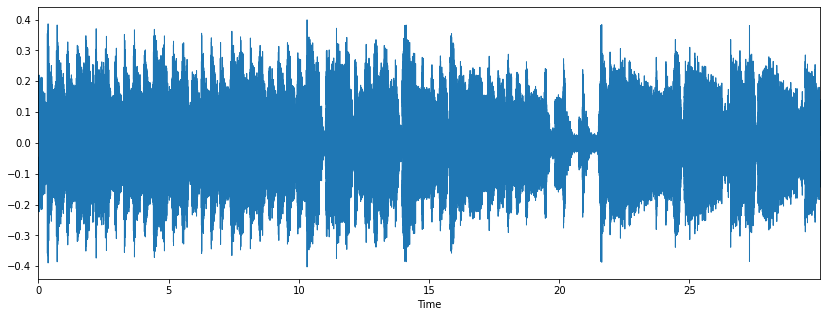

In [7]:
# visualise the audio
# plot the amplitude envelope of a wave form

plt.figure(figsize=(14, 5))

librosa.display.waveplot(x, sr=sr);

# question: is this a high or low energy song?

### Feature Extraction

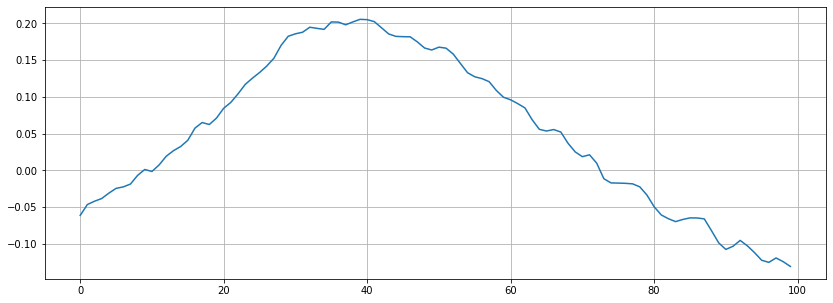

In [8]:
# how do we extract "features" from the audio data? 
# every audio signal consist of many features/ characteristics
# one simple way of extracting features, is to calculate the "zero-crossing rate"
# A zero-crossing is a point where the sign of a mathematical function changes (e.g. from positive to negative)
# represented by an intercept of the axis (zero value) in the graph of the function. 

# It usually has higher values for highly percussive sounds like those in metal and rock. Now let us visualize it and see how we calculate zero crossing rate.

# Zooming in - not sure why n0 and n1 start with 9, but using for demonstration only
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

# question: can you count how many zero crossings?


In [9]:
# confirm how many zero crossings using the function in librosa

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

4


In [10]:
# how many zero crossings does our audio data have?

zcr = librosa.zero_crossings(x).sum()
zcr


23928

In [11]:
# can also calculate the energy for the audio, which simply corresponds to the magnitude

energy = scipy.linalg.norm(x)
energy

84.27090454101562

Reference: https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html

In [12]:
import os
import pandas as pd
import glob


def create_audio_features_df(list_of_audio_files):
    """Method which loads a list of audio data files and returns a DataFrame with features extracted. 
    """

    audio_features = []

    for audio_file in list_of_audio_files:
        audio_file_name = os.path.basename(audio_file)

        # load the file into an array
        x , sr = librosa.load(audio_file)

        # extract features from the audio dictionry
        # zero crossing rate
        zcr = librosa.zero_crossings(x).sum()

        # energy
        energy = scipy.linalg.norm(x)

        # store as a dict
        audio_features.append({"audio_file_name": audio_file_name,
                                 "zero_crossing_rate": zcr,
                                 "energy": energy
                                 })
        
    audio_features_df = pd.DataFrame(audio_features)
    audio_features_df = audio_features_df.set_index("audio_file_name")
        
    return audio_features_df



In [13]:
list_of_audio_files = glob.glob('../data/music/*.wav')
list_of_audio_files

['../data/music/classical1.wav',
 '../data/music/marlene.wav',
 '../data/music/hendrix.wav',
 '../data/music/beatles.wav',
 '../data/music/birdland.wav',
 '../data/music/bigband.wav',
 '../data/music/rock.wav',
 '../data/music/blues.wav',
 '../data/music/chaka.wav',
 '../data/music/duke.wav',
 '../data/music/moanin.wav',
 '../data/music/loreena.wav',
 '../data/music/copland.wav',
 '../data/music/russo.wav',
 '../data/music/bagpipe.wav',
 '../data/music/tony.wav',
 '../data/music/glass.wav',
 '../data/music/guitar.wav',
 '../data/music/narch.wav',
 '../data/music/georose.wav',
 '../data/music/mingus.wav',
 '../data/music/brahms.wav',
 '../data/music/deedee.wav',
 '../data/music/canonaki.wav',
 '../data/music/ballad.wav',
 '../data/music/debussy.wav',
 '../data/music/pop.wav',
 '../data/music/corea.wav',
 '../data/music/opera.wav',
 '../data/music/winds.wav']

In [14]:
len(list_of_audio_files)

30

In [15]:
audio_features_df = create_audio_features_df(list_of_audio_files)
audio_features_df

,zero_crossing_rate,energy
audio_file_name,,
classical1.wav,35019,33.268707
marlene.wav,53817,52.843853
hendrix.wav,62196,75.526360
beatles.wav,23928,84.270905
birdland.wav,77597,111.841644
bigband.wav,84832,46.836525
rock.wav,99739,51.000175
blues.wav,48717,21.675022
chaka.wav,70596,129.563293


In [16]:
audio_features_df

,zero_crossing_rate,energy
audio_file_name,,
classical1.wav,35019,33.268707
marlene.wav,53817,52.843853
hendrix.wav,62196,75.526360
beatles.wav,23928,84.270905
birdland.wav,77597,111.841644
bigband.wav,84832,46.836525
rock.wav,99739,51.000175
blues.wav,48717,21.675022
chaka.wav,70596,129.563293


In [17]:
audio_features_df.to_csv("../data/music/audio_data_w_features.csv")

In [18]:
# read the audio file
